In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from phlame import simulation

In [123]:
wavelength = 1
lattice_constant = 1

# incident angles
theta = np.pi/18
phi = 0

n = 2.04  # refractive index

diffraction_order = -1  # diffraction order

# range of thicknesses
d_num = 200
d_range = np.linspace(45, 50, d_num)

# create simulation object
frequency = 2*np.pi/wavelength
num_order = 50
momentum = frequency*np.array([np.sin(theta)*np.cos(phi),
                               np.sin(theta)*np.sin(phi)])
sim = simulation.new(frequency, momentum, num_order)
sim.stack.set_lattice_constant(lattice_constant)
sim.stack.define_material('vacuum', 1)
sim.stack.define_material('SiO2', n**2)
sim.stack.define_pattern('grating', ['SiO2', 'vacuum'], [.5, .5])
# sim.stack.add_layers(['vacuum', 'SiO2'], [None, None])
sim.stack.add_layers(['vacuum', 'grating', 'SiO2'], [None, 1, None])

rp = np.zeros(d_num)
rs = np.zeros(d_num)
tp = np.zeros(d_num)
ts = np.zeros(d_num)
kx = momentum[0] + 2*np.pi/lattice_constant * diffraction_order
for i, d in enumerate(d_range):
    sim.stack.set_layer_thickness(1, d)
    sim.run()
    rs[i] = np.sqrt(1 - kx**2/frequency**2)/np.cos(theta) * np.abs(sim.get_reflection(polarization_in=[1,0], polarization_out=[1,0],
                                      order_out=diffraction_order))**2
    rp[i] = np.sqrt(1 - kx**2/frequency**2)/np.cos(theta) * np.abs(sim.get_reflection(polarization_in=[0,1], polarization_out=[0,1],
                                      order_out=diffraction_order))**2
    ts[i] = np.sqrt(n**2 - kx**2/frequency**2)/np.cos(theta) * np.abs(sim.get_transmission(polarization_in=[1,0], polarization_out=[1,0],
                                            order_out=diffraction_order))**2
    tp[i] = np.sqrt(n**2 - kx**2/frequency**2)/np.cos(theta) * np.abs(sim.get_transmission(polarization_in=[0,1], polarization_out=[0,1],
                                            order_out=diffraction_order))**2

(0.0, 1.0)

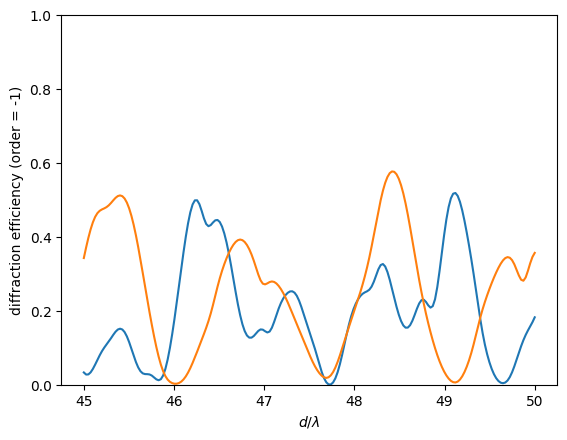

In [124]:
fig, ax = plt.subplots()
ax.plot(d_range, ts);
ax.plot(d_range, tp);
ax.set_xlabel("$d/\lambda$");
ax.set_ylabel(f"diffraction efficiency (order = {diffraction_order})");
ax.set_ylim(0, 1)

In [126]:
pol = [1, 0]
r = 0
t = 0
for do in range(int(-num_order/2+1), int(num_order/2)):
    kx = momentum[0] + 2*np.pi/lattice_constant * do
    if np.abs(kx) < frequency:
        r += np.sqrt(1 - kx**2/frequency**2)/np.cos(theta) * np.abs(sim.get_reflection(polarization_in=pol, polarization_out=pol, order_out=do))**2
    if np.abs(kx) < n*frequency:
        t += np.sqrt(n**2 - kx**2/frequency**2)/np.cos(theta) * np.abs(sim.get_transmission(polarization_in=pol, polarization_out=pol, order_out=do))**2
    
print(r+t-1)

3.3881786265510527e-12


In [88]:
print(r)
print(t)


0.04975823478496943
0.9502417652184189


3.3881786265510527e-12

In [ ]:
(1-r)/t

In [ ]:
(n-1)**(1/2)

In [148]:
wavelength = 1
lattice_constant = 1
d = 1

# incident angles
theta = np.pi/6
phi = 0

n = 0.22 + 6.71j  # refractive index

diffraction_order = 0  # diffraction order

# create simulation object
frequency = 2*np.pi/wavelength
momentum = frequency*np.array([np.sin(theta)*np.cos(phi),
                               np.sin(theta)*np.sin(phi)])
sim = simulation.new(frequency, momentum, num_order)
sim.stack.set_lattice_constant(lattice_constant)
sim.stack.define_material('vacuum', 1)
sim.stack.define_material('SiO2', n**2)
sim.stack.define_pattern('grating', ['SiO2', 'vacuum'], [.5, .5])
# sim.stack.add_layers(['vacuum', 'SiO2'], [None, None])
sim.stack.add_layers(['vacuum', 'grating', 'SiO2'], [None, 1, None])
sim.stack.set_layer_thickness(1, d)


orders = np.arange(5, 127, 2)

rp = np.zeros(len(orders))
rs = np.zeros(len(orders))
kx = momentum[0] + 2*np.pi/lattice_constant * diffraction_order
for i, order in enumerate(orders):
    sim.set_order_num(order)
    sim.run()
    rs[i] = np.sqrt(1 - kx**2/frequency**2)/np.cos(theta) * np.abs(sim.get_reflection(polarization_in=[1,0], polarization_out=[1,0],
                                      order_out=diffraction_order))**2
    rp[i] = np.sqrt(1 - kx**2/frequency**2)/np.cos(theta) * np.abs(sim.get_reflection(polarization_in=[0,1], polarization_out=[0,1],
                                      order_out=diffraction_order))**2

(0.0, 1.0)

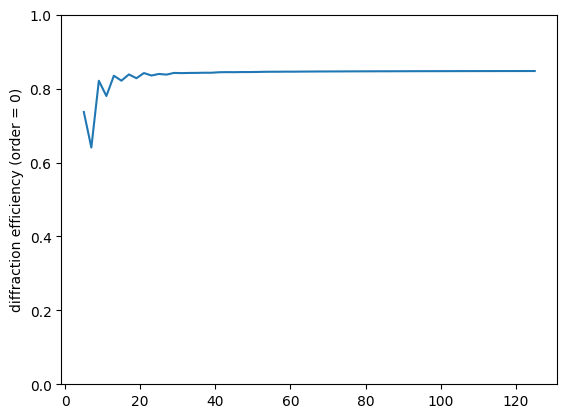

In [149]:
fig, ax = plt.subplots()
ax.plot(orders, rp);
# ax.plot(orders, rp);
ax.set_ylabel(f"diffraction efficiency (order = {diffraction_order})");
ax.set_ylim(0, 1)

In [150]:
rp[-1]

0.847556330466339

In [144]:
np.sqrt(1 - kx**2/frequency**2)/np.cos(theta)

1.0